In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
#import data
df = pd.read_csv(r'cleaned_data.csv')
df.head()

,Date,ALB_ZBRA,NRG_CPRT,DE_BXP,NRG_STE,NRG_XRAY,SO_NLOK,PEG_O
0,2020-08-31,0.311845,0.310544,2.548054,0.203834,0.727693,2.136432,0.882281
1,2020-09-01,0.332974,0.306303,2.687319,0.203522,0.722940,2.094566,0.855546
2,2020-09-02,0.332368,0.315056,2.629334,0.204743,0.734758,2.125291,0.872526
3,2020-09-03,0.339772,0.310060,2.534974,0.201707,0.728923,2.210971,0.848504
4,2020-09-04,0.356920,0.300754,2.536138,0.199887,0.707646,2.152835,0.854765


In [28]:
df.tail(2)

,Date,ALB_ZBRA,NRG_CPRT,DE_BXP,NRG_STE,NRG_XRAY,SO_NLOK,PEG_O
495,2022-08-18,0.816374,0.333768,4.22249,0.204492,1.196920,3.371537,0.950678
496,2022-08-19,0.822204,0.334919,4.28095,0.204631,1.200391,3.405268,0.951858


In [29]:
df.shape

(497, 8)

In [30]:
# we check first chosen ratios first (here: ALB_ZBRA)
df_small=df.iloc[:,[0,1]]
df_small.head()

,Date,ALB_ZBRA
0,2020-08-31,0.311845
1,2020-09-01,0.332974
2,2020-09-02,0.332368
3,2020-09-03,0.339772
4,2020-09-04,0.356920


In [31]:
df_small.shape

(497, 2)

In [32]:
df_small.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      497 non-null    object 
 1   ALB_ZBRA  497 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.9+ KB


## Splitting Data in Train and Validation

In [33]:
length_data = len(df_small)    
split_ratio = 0.7           # %70 train + %30 validation
length_train = round(length_data * split_ratio)  
length_validation = length_data - length_train
print("Data length :", length_data)
print("Train data length:", length_train)
print("Validation data lenth:", length_validation)

Data length : 497
Train data length: 348
Validation data lenth: 149


In [34]:
# train_data
train_data = df_small[:length_train].iloc[:,:2] 
train_data['Date'] = pd.to_datetime(train_data['Date'])  # converting to date time object
train_data

,Date,ALB_ZBRA
0,2020-08-31,0.311845
1,2020-09-01,0.332974
2,2020-09-02,0.332368
3,2020-09-03,0.339772
4,2020-09-04,0.356920
...,...,...
343,2022-01-10,0.422384
344,2022-01-11,0.444326
345,2022-01-12,0.446099
346,2022-01-13,0.445756


In [35]:
# validation_data
validation_data = df_small[length_train:].iloc[:,:2]
validation_data['Date'] = pd.to_datetime(validation_data['Date'])  # converting to date time object
validation_data

,Date,ALB_ZBRA
348,2022-01-18,0.436370
349,2022-01-19,0.426604
350,2022-01-20,0.431503
351,2022-01-21,0.428953
352,2022-01-24,0.430432
...,...,...
492,2022-08-15,0.813028
493,2022-08-16,0.814154
494,2022-08-17,0.815450
495,2022-08-18,0.816374


## Creating Train Dataset from Train split

In [36]:
dataset_train = train_data.ALB_ZBRA.values
dataset_train.shape

(348,)

In [37]:
# Change 1d array to 2d array
# Changing shape from (1692,) to (1692,1)
dataset_train = np.reshape(dataset_train, (-1,1))
dataset_train.shape

(348, 1)

## Normalization / Feature Scaling

In [38]:
# Dataset values will be in between 0 and 1 after scaling

In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))


# scaling dataset
dataset_train_scaled = scaler.fit_transform(dataset_train)

dataset_train_scaled.shape

(348, 1)

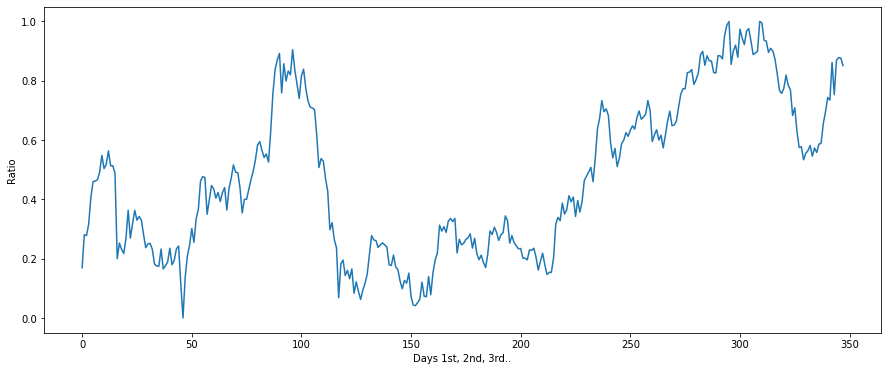

In [40]:
plt.subplots(figsize = (15,6))
plt.plot(dataset_train_scaled)
plt.xlabel("Days 1st, 2nd, 3rd..")
plt.ylabel("Ratio")
plt.show()

## Creating X_train and y_train from Train data

We have train data composed of ratios over days

So, it has 1184 ratios corresponding 1184 days

My aim is to predict the ratio (closing) of the next day.

I can use a time step of 2 days.

I will pick first 2 ratios (day 0 to 2), 1st 2 ratio will be in 
X_train data

Then predict the ratio of 3rd day; and 3rd ratio will be in y_train data

Again, i will pick ratios from 1 to 3, those will be in X_train data

Then predict the next days ratio, 4th ratio will be in y_train data



In [41]:
#question: which time step makes sense?

X_train = []
y_train = []

time_step = 2 #change that?

for i in range(time_step, length_train):
    X_train.append(dataset_train_scaled[i-time_step:i,0])
    y_train.append(dataset_train_scaled[i,0])
    
# convert list to array
X_train, y_train = np.array(X_train), np.array(y_train)

In [42]:
dataset_train_scaled[i-time_step:i]

array([[0.8783648 ],
       [0.87655523]])

In [43]:
dataset_train_scaled[i,0]

0.8512020362332713

In [44]:
print("Shape of X_train before reshape:",X_train.shape)
print("Shape of y_train before reshape:",y_train.shape)

Shape of X_train before reshape: (346, 2)
Shape of y_train before reshape: (346,)


In [45]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))

print("Shape of X_train after reshape :",X_train.shape)
print("Shape of y_train after reshape :",y_train.shape)

Shape of X_train after reshape : (346, 2, 1)
Shape of y_train after reshape : (346, 1)


In [46]:
X_train[0]

array([[0.16942742],
       [0.28100047]])

In [47]:
X_train = X_train[:int(X_train.shape[0]*0.95)]
X_val = X_train[int(X_train.shape[0]*0.95):]
y_train = y_train[:int(y_train.shape[0]*0.95)]
y_val = y_train[int(y_train.shape[0]*0.95):]

Check the first item in y_train
It is the ratio of 2nd day (timestep 2)

In [48]:
y_train[0]

array([0.27779767])

## Creating RNN model

In [49]:
### open questions
#### makes the combination of RNN, LSTM and GRU sense?

# importing libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

# initializing the RNN
regressor = Sequential()

# adding first RNN layer and dropout regulatization
regressor.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True))
regressor.add(Dropout(0.2))

# adding second RNN layer and dropout regulatization
regressor.add(SimpleRNN(units = 50, activation = "tanh",return_sequences = True))
regressor.add(Dropout(0.2))

# adding third RNN layer and dropout regulatization
regressor.add(SimpleRNN(units = 50,activation = "tanh", return_sequences = True))
regressor.add(Dropout(0.2))

# adding fourth RNN layer and dropout regulatization
regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))

# adding the output layer
regressor.add(Dense(units = 1))

# compiling RNN
regressor.compile(optimizer = "rmsprop", loss = "mean_squared_error",metrics = ["mae", "mape"]) #rmsprop as optimizer for RNN?

# fitting the RNN
history = regressor.fit(X_train, y_train, epochs = 100, batch_size = 32, validation_data=(X_val, y_val))

Epoch 1/100
11/11 [==============================] - 5s 90ms/step - loss: 0.1737 - mae: 0.3026 - mape: 2067863.5461 - val_loss: 0.0024 - val_mae: 0.0408 - val_mape: 5.5435
Epoch 2/100
11/11 [==============================] - 0s 3ms/step - loss: 0.0581 - mae: 0.1742 - mape: 318701.0776 - val_loss: 0.0658 - val_mae: 0.2530 - val_mape: 34.8769
Epoch 3/100
11/11 [==============================] - 0s 4ms/step - loss: 0.0532 - mae: 0.1636 - mape: 195974.1245 - val_loss: 0.0305 - val_mae: 0.1696 - val_mape: 23.5049
Epoch 4/100
11/11 [==============================] - 0s 3ms/step - loss: 0.0402 - mae: 0.1477 - mape: 949693.2050 - val_loss: 0.0120 - val_mae: 0.1005 - val_mape: 14.2258
Epoch 5/100
11/11 [==============================] - 0s 3ms/step - loss: 0.0349 - mae: 0.1365 - mape: 998290.7945 - val_loss: 0.0450 - val_mae: 0.2039 - val_mape: 26.6134
Epoch 6/100
11/11 [==============================] - 0s 3ms/step - loss: 0.0459 - mae: 0.1582 - mape: 344660.0617 - val_loss: 0.0062 - val_mae: 

Epoch 49/100
11/11 [==============================] - 0s 3ms/step - loss: 0.0090 - mae: 0.0713 - mape: 334395.1196 - val_loss: 0.0018 - val_mae: 0.0353 - val_mape: 4.7794
Epoch 50/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0075 - mae: 0.0650 - mape: 521012.8981 - val_loss: 0.0017 - val_mae: 0.0324 - val_mape: 4.6256
Epoch 51/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0090 - mae: 0.0700 - mape: 455535.2260 - val_loss: 0.0452 - val_mae: 0.2080 - val_mape: 28.1625
Epoch 52/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0119 - mae: 0.0811 - mape: 1064630.2913 - val_loss: 0.0018 - val_mae: 0.0362 - val_mape: 4.9697
Epoch 53/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0071 - mae: 0.0661 - mape: 255644.0260 - val_loss: 0.0028 - val_mae: 0.0450 - val_mape: 5.8250
Epoch 54/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0093 - mae: 0.0727 - mape: 649084.8449 - val_loss: 0.0015 - val_mae

Epoch 97/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0074 - mae: 0.0665 - mape: 704869.3479 - val_loss: 0.0017 - val_mae: 0.0346 - val_mape: 4.5953
Epoch 98/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0063 - mae: 0.0601 - mape: 1104562.1323 - val_loss: 0.0026 - val_mae: 0.0424 - val_mape: 6.0506
Epoch 99/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0058 - mae: 0.0577 - mape: 203920.2878 - val_loss: 0.0061 - val_mae: 0.0707 - val_mape: 9.9865
Epoch 100/100
11/11 [==============================] - 0s 3ms/step - loss: 0.0073 - mae: 0.0643 - mape: 850421.3647 - val_loss: 0.0016 - val_mae: 0.0340 - val_mape: 4.6634


## Evaluating Model

In [50]:
# Losses
history.history["loss"]

[0.12960796058177948,
 0.05400346964597702,
 0.04230062663555145,
 0.038579102605581284,
 0.033838219940662384,
 0.03679607808589935,
 0.02851235866546631,
 0.02532525174319744,
 0.026093576103448868,
 0.02542473003268242,
 0.021466335281729698,
 0.017075715586543083,
 0.01999467797577381,
 0.018163282424211502,
 0.01423707790672779,
 0.016298489645123482,
 0.014542701654136181,
 0.016868609935045242,
 0.013771375641226768,
 0.015071801841259003,
 0.014500381425023079,
 0.014065301977097988,
 0.011877520941197872,
 0.013322049751877785,
 0.013432593084871769,
 0.01046816073358059,
 0.012823858298361301,
 0.012370679527521133,
 0.01251851487904787,
 0.009772202000021935,
 0.016109684482216835,
 0.009853345341980457,
 0.009272610768675804,
 0.009309529326856136,
 0.009466017596423626,
 0.010577469132840633,
 0.011056149378418922,
 0.010100170969963074,
 0.008728276006877422,
 0.010824579745531082,
 0.007590172346681356,
 0.007585939019918442,
 0.010043616406619549,
 0.00856227520853281,


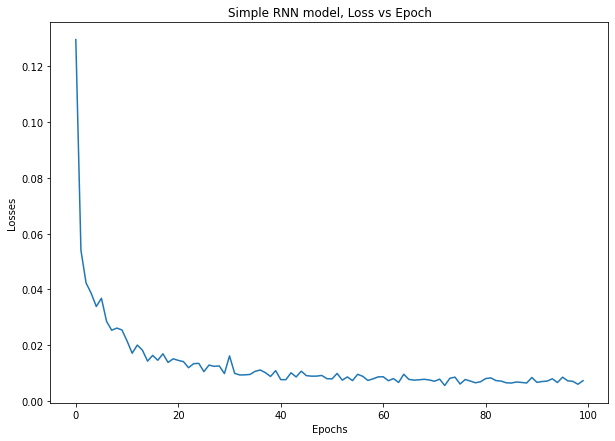

In [51]:
# Plotting Loss vs Epochs
plt.figure(figsize =(10,7))
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Simple RNN model, Loss vs Epoch")
plt.show()

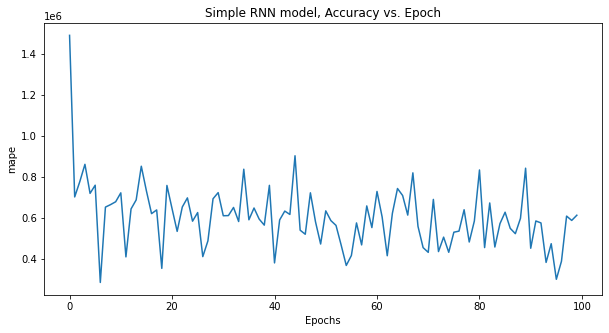

In [52]:
# Plotting Accuracy vs Epochs
plt.figure(figsize =(10,5))
plt.plot(history.history["mape"])
plt.xlabel("Epochs")
plt.ylabel("mape")
plt.title("Simple RNN model, Accuracy vs. Epoch")
plt.show()

## Model predictions for train data¶


In [53]:
y_pred = regressor.predict(X_train)  # predictions
y_pred = scaler.inverse_transform(y_pred) # scaling back from 0-1 to original
y_pred.shape

(328, 1)

<AxesSubplot:>

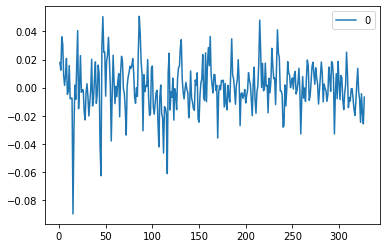

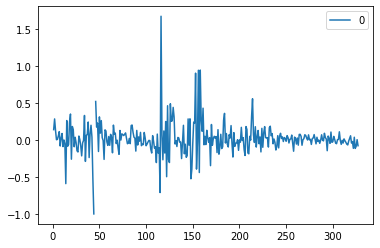

In [54]:
pd.DataFrame(y_pred).pct_change().plot()
pd.DataFrame(y_train).pct_change().plot()

<AxesSubplot:>

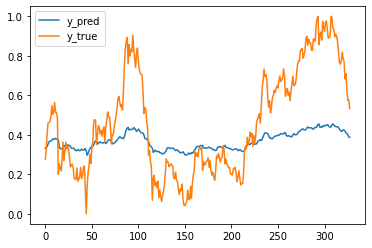

In [55]:
pd.DataFrame({"y_pred":y_pred.flatten(), "y_true":y_train.flatten()}).plot()

In [56]:
y_train = scaler.inverse_transform(y_train) # scaling back from 0-1 to original
y_train.shape

(328, 1)

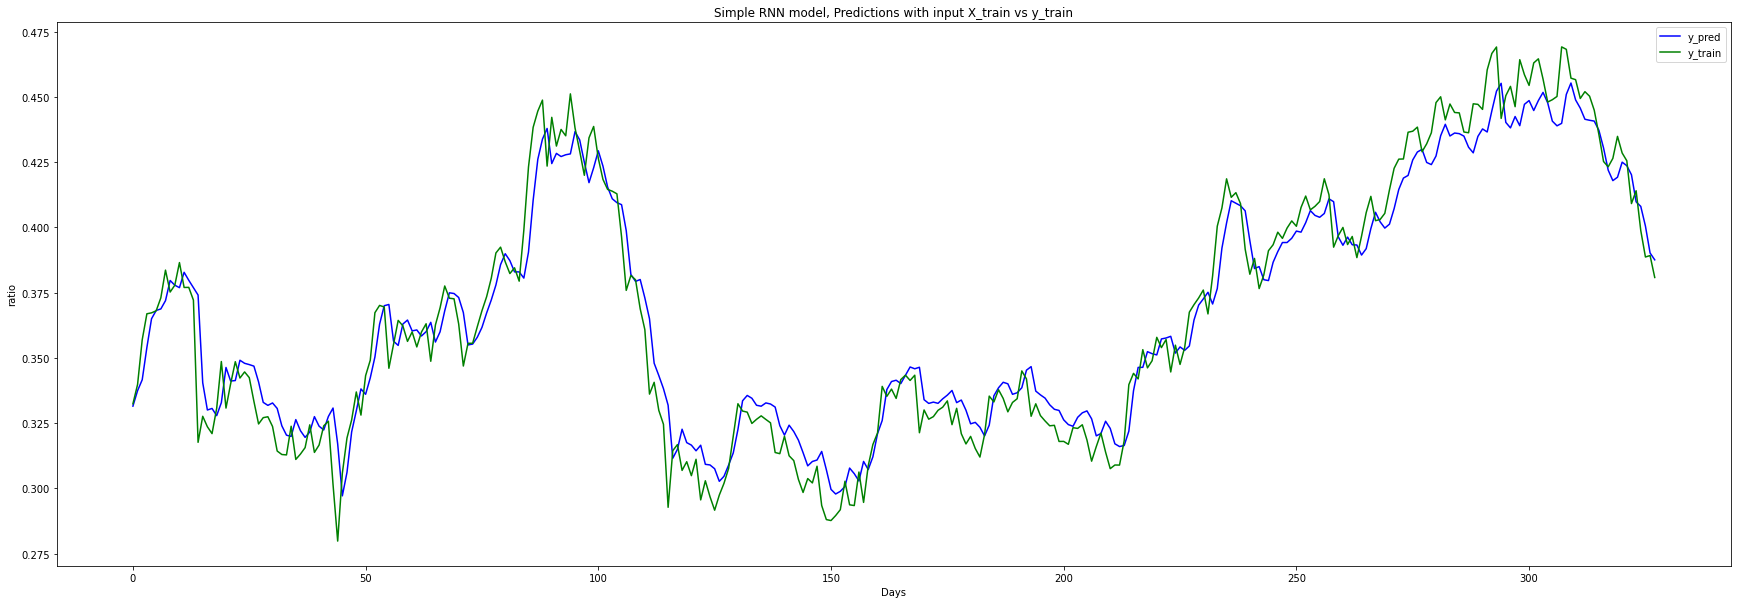

In [57]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred, color = "b", label = "y_pred" )
plt.plot(y_train, color = "g", label = "y_train")
plt.xlabel("Days")
plt.ylabel("ratio")
plt.title("Simple RNN model, Predictions with input X_train vs y_train")
plt.legend()
plt.show()



## Creating Test Dataset from Validation Data

In [58]:
#Converting array and scaling
dataset_validation = validation_data.ALB_ZBRA.values  # getting "Ratio" column and converting to array
dataset_validation = np.reshape(dataset_validation, (-1,1))  # converting 1D to 2D array
scaled_dataset_validation =  scaler.fit_transform(dataset_validation)  # scaling  values to between 0 and 1
print("Shape of scaled validation dataset :",scaled_dataset_validation.shape)

Shape of scaled validation dataset : (149, 1)


In [59]:
#Creating X_test and y_test
X_test = []
y_test = []

for i in range(time_step, length_validation):
    X_test.append(scaled_dataset_validation[i-time_step:i,0])
    y_test.append(scaled_dataset_validation[i,0])

In [60]:
# Converting to array
X_test, y_test = np.array(X_test), np.array(y_test)

In [61]:
print("Shape of X_test before reshape :",X_test.shape)
print("Shape of y_test before reshape :",y_test.shape)

Shape of X_test before reshape : (147, 2)
Shape of y_test before reshape : (147,)


In [62]:
#reshape
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))  # reshape to 3D array
y_test = np.reshape(y_test, (-1,1))  # reshape to 2D array

In [63]:
print("Shape of X_test after reshape :",X_test.shape)
print("Shape of y_test after reshape :",y_test.shape)

Shape of X_test after reshape : (147, 2, 1)
Shape of y_test after reshape : (147, 1)


## Evaluating with Validation Data

In [64]:
regressor.evaluate(X_test, y_test)

5/5 [==============================] - 0s 902us/step - loss: 0.0043 - mae: 0.0483 - mape: 614021.8750


[0.004254898056387901, 0.04828614741563797, 614021.875]

In [65]:
# predictions with X_test data
y_pred_of_test = regressor.predict(X_test)
# scaling back from 0-1 to original
y_pred_of_test = scaler.inverse_transform(y_pred_of_test) 
print("Shape of y_pred_of_test :",y_pred_of_test.shape)

Shape of y_pred_of_test : (147, 1)


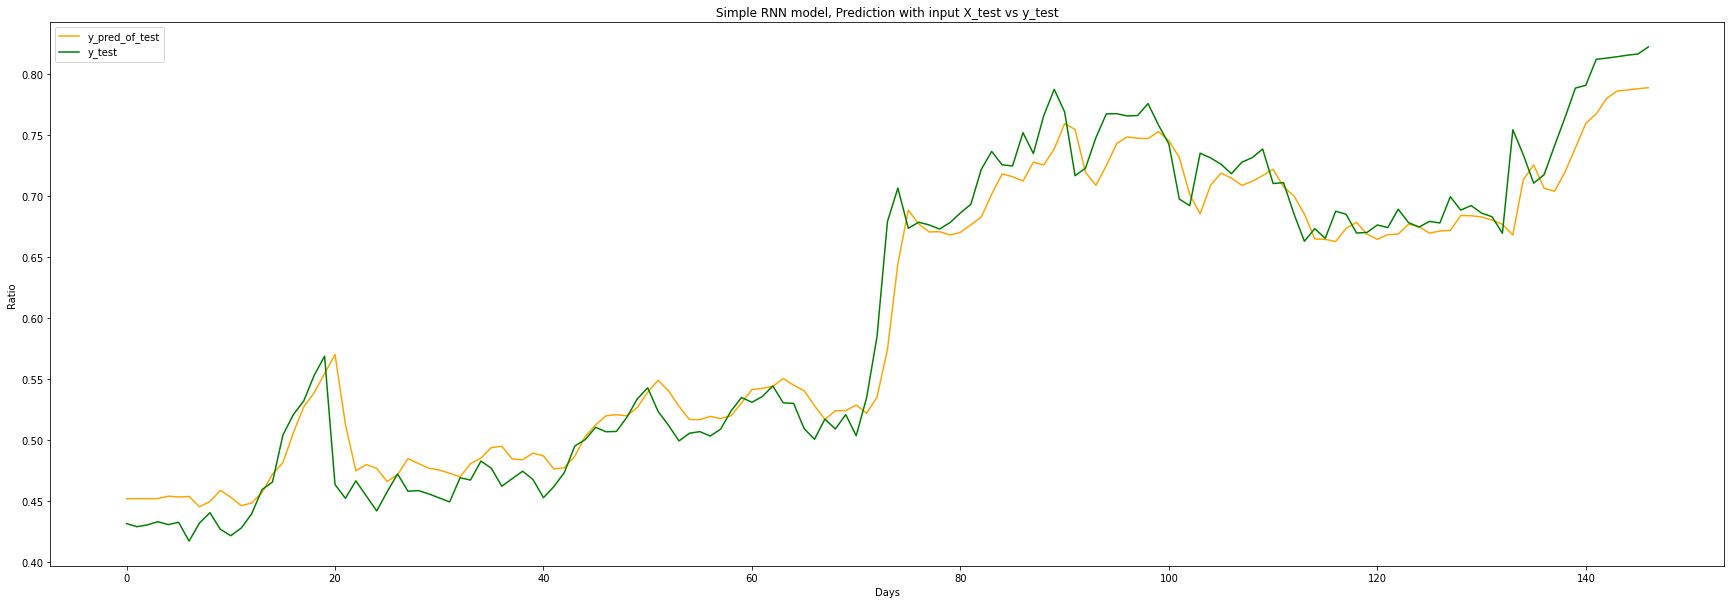

In [66]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred_of_test, label = "y_pred_of_test", c = "orange")
plt.plot(scaler.inverse_transform(y_test), label = "y_test", c = "g")
plt.xlabel("Days")
plt.ylabel("Ratio")
plt.title("Simple RNN model, Prediction with input X_test vs y_test")
plt.legend()
plt.show()

ValueError: x and y must have same first dimension, but have shapes (346,) and (328, 1)

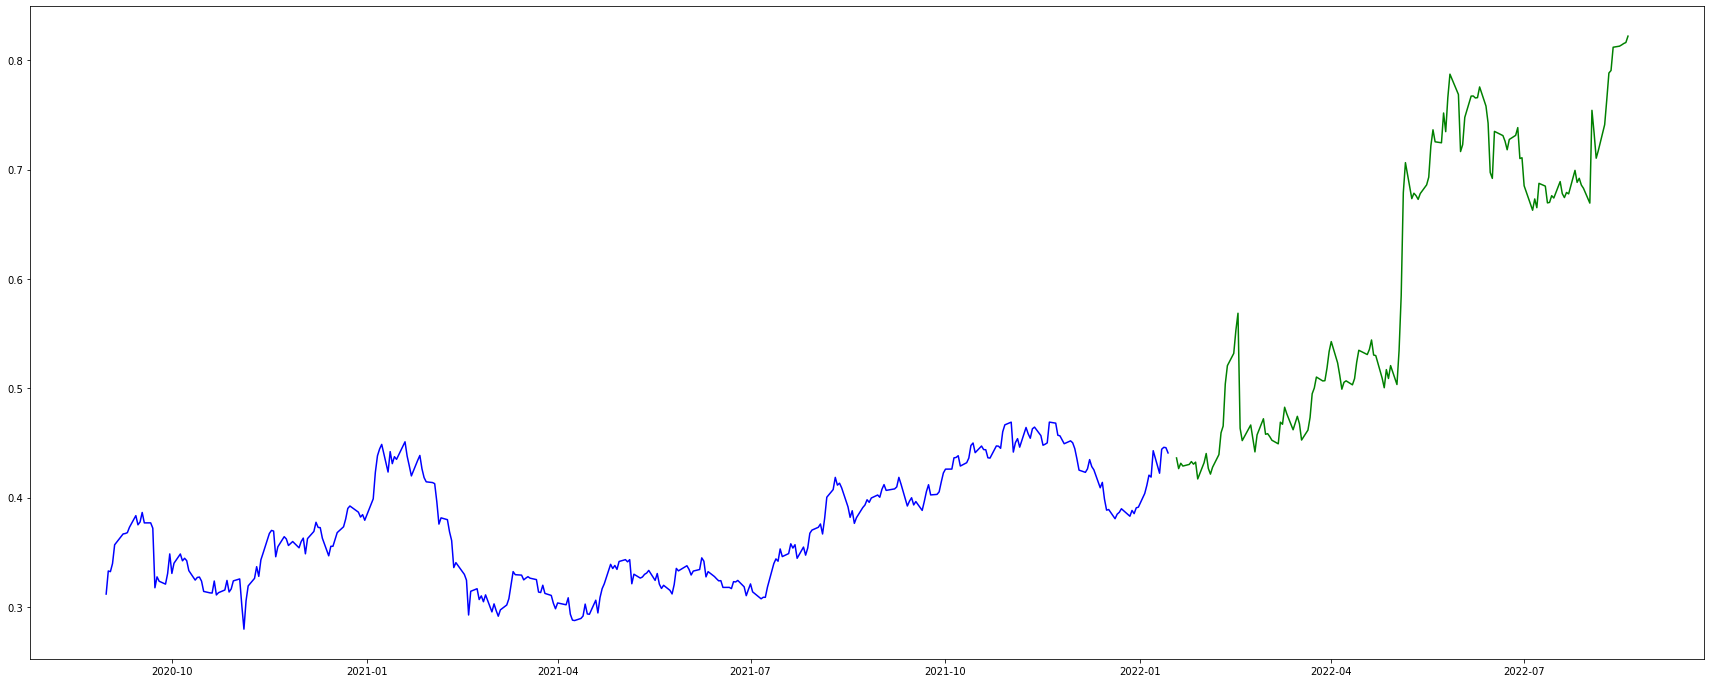

In [67]:
# Visualisation
plt.subplots(figsize =(30,12))
plt.plot(train_data.Date, train_data.ALB_ZBRA, label = "train_data", color = "b")
plt.plot(validation_data.Date, validation_data.ALB_ZBRA, label = "validation_data", color = "g")
plt.plot(train_data.Date.iloc[time_step:], y_pred, label = "y_pred", color = "r")
plt.plot(validation_data.Date.iloc[time_step:], y_pred_of_test, label = "y_pred_of_test", color = "orange")
plt.xlabel("Days")
plt.ylabel("ratio")
plt.title("Simple RNN model, Train-Validation-Prediction")
plt.legend()
plt.show()

## Creating LSTM Model

In [69]:
y_train = scaler.fit_transform(y_train)

In [80]:
from keras.layers import LSTM

model_lstm = Sequential()

model_lstm.add(LSTM(64,return_sequences=True,input_shape = (X_train.shape[1],1))) #64 lstm neuron block
model_lstm.add(LSTM(64, return_sequences= False))
model_lstm.add(Dense(32))
model_lstm.add(Dense(1))

model_lstm.compile(loss = "mean_squared_error", optimizer = "rmsprop", metrics = ["mae", "mape"])
history2 = model_lstm.fit(X_train, y_train, epochs = 100, batch_size = 10)

Epoch 1/100
33/33 [==============================] - 2s 3ms/step - loss: 0.1179 - mae: 0.2596 - mape: 1177433.6668
Epoch 2/100
33/33 [==============================] - 0s 2ms/step - loss: 0.0075 - mae: 0.0709 - mape: 953189.9977
Epoch 3/100
33/33 [==============================] - 0s 2ms/step - loss: 0.0045 - mae: 0.0538 - mape: 151364.9726
Epoch 4/100
33/33 [==============================] - 0s 2ms/step - loss: 0.0049 - mae: 0.0555 - mape: 91997.9686
Epoch 5/100
33/33 [==============================] - 0s 2ms/step - loss: 0.0057 - mae: 0.0577 - mape: 1708620.0662
Epoch 6/100
33/33 [==============================] - 0s 2ms/step - loss: 0.0055 - mae: 0.0567 - mape: 1263743.8018
Epoch 7/100
33/33 [==============================] - 0s 2ms/step - loss: 0.0051 - mae: 0.0563 - mape: 125782.2088
Epoch 8/100
33/33 [==============================] - 0s 2ms/step - loss: 0.0053 - mae: 0.0532 - mape: 708176.0820
Epoch 9/100
33/33 [==============================] - 0s 2ms/step - loss: 0.0052 - mae:

33/33 [==============================] - 0s 2ms/step - loss: 0.0033 - mae: 0.0440 - mape: 431222.6465
Epoch 73/100
33/33 [==============================] - 0s 2ms/step - loss: 0.0037 - mae: 0.0460 - mape: 194080.8277
Epoch 74/100
33/33 [==============================] - 0s 2ms/step - loss: 0.0033 - mae: 0.0423 - mape: 329606.3852
Epoch 75/100
33/33 [==============================] - 0s 2ms/step - loss: 0.0025 - mae: 0.0386 - mape: 333045.4816
Epoch 76/100
33/33 [==============================] - 0s 2ms/step - loss: 0.0024 - mae: 0.0378 - mape: 99097.4668
Epoch 77/100
33/33 [==============================] - 0s 2ms/step - loss: 0.0032 - mae: 0.0443 - mape: 585006.7036
Epoch 78/100
33/33 [==============================] - 0s 2ms/step - loss: 0.0036 - mae: 0.0466 - mape: 366761.9806
Epoch 79/100
33/33 [==============================] - 0s 2ms/step - loss: 0.0031 - mae: 0.0425 - mape: 123445.9383
Epoch 80/100
33/33 [==============================] - 0s 2ms/step - loss: 0.0034 - mae: 0.0450

In [71]:
### loss seems ok but mape is really high. how to improve?

## Evaluating LSTM Model

In [81]:
model_lstm.evaluate(X_test, y_test)

5/5 [==============================] - 0s 1ms/step - loss: 0.0028 - mae: 0.0366 - mape: 505947.3125


[0.002816028194501996, 0.03656519204378128, 505947.3125]

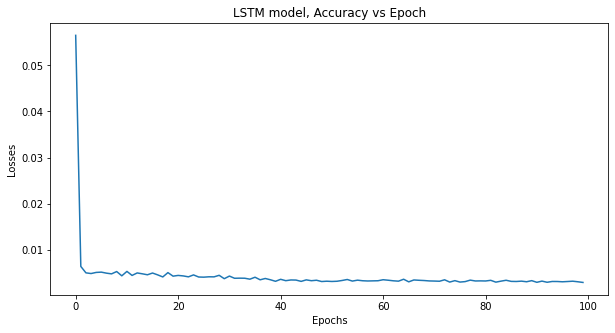

In [82]:
plt.figure(figsize =(10,5))
plt.plot(history2.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("LSTM model, Accuracy vs Epoch")
plt.show()

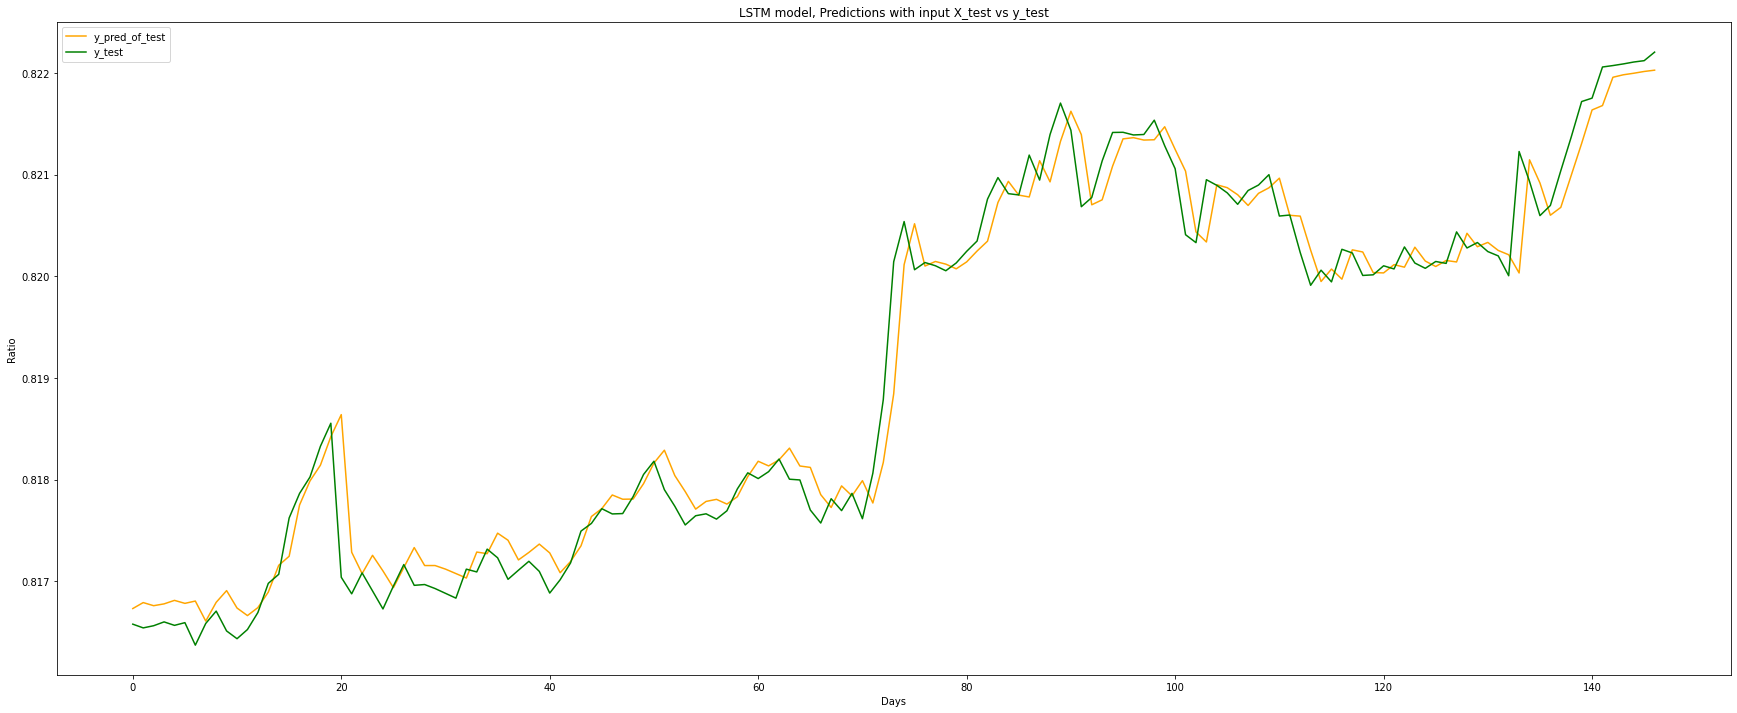

In [83]:
plt.subplots(figsize =(30,12))
plt.plot(scaler.inverse_transform(model_lstm.predict(X_test)), label = "y_pred_of_test", c = "orange" )
plt.plot(scaler.inverse_transform(y_test), label = "y_test", color = "g")
plt.xlabel("Days")
plt.ylabel("Ratio")
plt.title("LSTM model, Predictions with input X_test vs y_test")
plt.legend()
plt.show()

## Creating mixed model

In [84]:
# baseline 
from keras.layers import LSTM

model_lstm = Sequential()

model_lstm.add(LSTM(64,return_sequences=True,input_shape = (X_train.shape[1],1))) #64 lstm neuron block
model_lstm.add(LSTM(64, return_sequences= False))
model_lstm.add(Dense(32))
model_lstm.add(Dense(1))

model_lstm.compile(loss = "mean_squared_error", optimizer = "rmsprop", metrics = ["mae", "mape"])
history2 = model_lstm.fit(X_train, y_train, epochs = 100, batch_size = 10)

Epoch 1/100
33/33 [==============================] - 2s 3ms/step - loss: 0.1168 - mae: 0.2590 - mape: 144802.2154
Epoch 2/100
33/33 [==============================] - 0s 2ms/step - loss: 0.0082 - mae: 0.0730 - mape: 57072.1326
Epoch 3/100
33/33 [==============================] - 0s 2ms/step - loss: 0.0056 - mae: 0.0575 - mape: 197607.3963
Epoch 4/100
33/33 [==============================] - 0s 2ms/step - loss: 0.0041 - mae: 0.0496 - mape: 337919.7449
Epoch 5/100
33/33 [==============================] - 0s 2ms/step - loss: 0.0050 - mae: 0.0546 - mape: 831841.8754
Epoch 6/100
33/33 [==============================] - 0s 2ms/step - loss: 0.0043 - mae: 0.0522 - mape: 248121.6331
Epoch 7/100
33/33 [==============================] - 0s 2ms/step - loss: 0.0044 - mae: 0.0509 - mape: 1238920.1081
Epoch 8/100
33/33 [==============================] - 0s 2ms/step - loss: 0.0047 - mae: 0.0524 - mape: 1311434.1709
Epoch 9/100
33/33 [==============================] - 0s 2ms/step - loss: 0.0047 - mae: 

33/33 [==============================] - 0s 2ms/step - loss: 0.0032 - mae: 0.0438 - mape: 1191551.8592
Epoch 73/100
33/33 [==============================] - 0s 2ms/step - loss: 0.0032 - mae: 0.0449 - mape: 195455.1326
Epoch 74/100
33/33 [==============================] - 0s 2ms/step - loss: 0.0035 - mae: 0.0427 - mape: 776778.4988
Epoch 75/100
33/33 [==============================] - 0s 2ms/step - loss: 0.0025 - mae: 0.0373 - mape: 65840.7224
Epoch 76/100
33/33 [==============================] - 0s 2ms/step - loss: 0.0030 - mae: 0.0409 - mape: 500603.5105
Epoch 77/100
33/33 [==============================] - 0s 2ms/step - loss: 0.0032 - mae: 0.0411 - mape: 316307.3829
Epoch 78/100
33/33 [==============================] - 0s 2ms/step - loss: 0.0028 - mae: 0.0411 - mape: 1321402.4999
Epoch 79/100
33/33 [==============================] - 0s 2ms/step - loss: 0.0030 - mae: 0.0414 - mape: 214906.4840
Epoch 80/100
33/33 [==============================] - 0s 2ms/step - loss: 0.0032 - mae: 0.04

In [ ]:
# baseline 
from keras.layers import LSTM

model_lstm = Sequential()

model_lstm.add(LSTM(64,return_sequences=True,input_shape = (X_train.shape[1],1))) #64 lstm neuron block
model_lstm.add(LSTM(64, return_sequences= False))
model_lstm.add(Dense(32))
model_lstm.add(Dense(1))

model_lstm.compile(loss = "mean_squared_error", optimizer = "rmsprop", metrics = ["mae", "mape"])
history2 = model_lstm.fit(X_train, y_train, epochs = 100, batch_size = 10)

## Future price prediction

In [75]:
#last day in our data?
df.iloc[-1]

Date        2022-08-19
ALB_ZBRA      0.822204
NRG_CPRT      0.334919
DE_BXP         4.28095
NRG_STE       0.204631
NRG_XRAY      1.200391
SO_NLOK       3.405268
PEG_O         0.951858
Name: 496, dtype: object

### We can predict the ratio for the day after 2022-08-23--> for 2022-08-24.
We will use last ratios as input of our model for this prediction.

In [76]:
X_input = df.iloc[-time_step:].ALB_ZBRA.values             # getting last rows and converting to array
X_input = scaler.fit_transform(X_input.reshape(-1,1))     # converting to 2D array and scaling
X_input = np.reshape(X_input, (1,time_step,1))                    # reshaping: converting to 3D array
print("Shape of X_input :", X_input.shape)
X_input

Shape of X_input : (1, 2, 1)


array([[[0.],
        [1.]]])

In [77]:
simple_RNN_prediction = scaler.inverse_transform(regressor.predict(X_input))
LSTM_prediction = scaler.inverse_transform(model_lstm.predict(X_input))
print("Simple RNN, prediction for 2022-08-24:", simple_RNN_prediction[0,0])
print("LSTM, prediction for 2022-08-24:", LSTM_prediction[0,0])

Simple RNN, prediction for 2022-08-24: 0.82005394
LSTM, prediction for 2022-08-24: 0.81837624
